In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Computational Media Lab/Weed Study/CSV for mass database organization/R:DailyDabbers/top_influential_full_data.csv')
df.head()

,node_type,depth,id,parent_id,post_id,created_utc,author,score,body_text,parent_body_text,distinguished,num_comments,media,quarter,Epoch
0,post,0,3ts68m,NaN,3ts68m,2015-11-22 05:19:04,rukiddingdood,3,"Welcome, let's get this party started. If you'...",NaN,NaN,9.0,NaN,2015Q4,E0_Seed
1,comment,1,cxh36nx,3ts68m,NaN,2015-11-29 20:36:04,common-object,3,To my understanding you're hoping to have a co...,"Welcome, let's get this party started. If you'...",NaN,NaN,NaN,2015Q4,E0_Seed
2,reply,2,cyywwf3,cxh36nx,NaN,2016-01-15 05:48:22,rukiddingdood,1,Looking to make this a discussion focused envi...,To my understanding you're hoping to have a co...,moderator,NaN,NaN,2016Q1,E0_Seed
3,comment,1,cxjmh3v,3ts68m,NaN,2015-12-01 21:56:27,Serrok,1,It seems to me there should be a difference be...,"Welcome, let's get this party started. If you'...",NaN,NaN,NaN,2015Q4,E0_Seed
4,reply,2,cxki2cm,cxjmh3v,NaN,2015-12-02 16:30:15,lps2,3,I think this sub would be a good place for thi...,It seems to me there should be a difference be...,NaN,NaN,NaN,2015Q4,E0_Seed


In [3]:
df.info

<bound method DataFrame.info of      node_type  depth       id parent_id  post_id          created_utc  \
0         post      0   3ts68m       NaN   3ts68m  2015-11-22 05:19:04   
1      comment      1  cxh36nx    3ts68m      NaN  2015-11-29 20:36:04   
2        reply      2  cyywwf3   cxh36nx      NaN  2016-01-15 05:48:22   
3      comment      1  cxjmh3v    3ts68m      NaN  2015-12-01 21:56:27   
4        reply      2  cxki2cm   cxjmh3v      NaN  2015-12-02 16:30:15   
...        ...    ...      ...       ...      ...                  ...   
5800     reply      2  jfla7sz   jfilyms      NaN  2023-04-09 17:05:56   
5801      post      0  138rh4r       NaN  138rh4r  2023-05-05 15:04:50   
5802   comment      1  jj1qiea   138rh4r      NaN  2023-05-06 03:29:45   
5803     reply      2  jj1xxel   jj1qiea      NaN  2023-05-06 04:42:51   
5804      post      0  13hva62       NaN  13hva62  2023-05-15 02:44:37   

             author  score                                          body_text  

In [4]:
df['Epoch'].value_counts()


Epoch
E1_Takeoff         3592
E2_PandemicBoom    1873
E3_PostPeak         200
E0_Seed             140
Name: count, dtype: int64

In [5]:
# Use full set (or sample if needed)
sample_df = df[df["body_text"].notna()].copy()
documents = sample_df["body_text"].astype(str).tolist()


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

# Preprocessing
stop_words = list(ENGLISH_STOP_WORDS)
vectorizer_model = CountVectorizer(stop_words=stop_words)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric="cosine")
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples=10, prediction_data=True)

# Train
topic_model = BERTopic(
    vectorizer_model=vectorizer_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    calculate_probabilities=True,
    verbose=True
)

topics, probs = topic_model.fit_transform(documents)
sample_df["topic"] = topics


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-03 20:30:29,475 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 182/182 [00:21<00:00,  8.39it/s]
2025-06-03 20:30:52,512 - BERTopic - Embedding - Completed ✓
2025-06-03 20:30:52,513 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-06-03 20:31:01,565 - BERTopic - Dimensionality - Completed ✓
2025-06-03 20:31:01,566 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-03 20:31:01,960 - BERTopic - Cluster - Completed ✓
2025-06-03 20:31:01,967 - BERTopic - Representation - Fine-tuning topics using representation mode

In [7]:
reduced_model = topic_model.reduce_topics(documents, nr_topics=15)
topics_reduced, probs_reduced = reduced_model.transform(documents)

sample_df["topic"] = topics_reduced
topic_model = reduced_model


2025-06-03 20:31:19,510 - BERTopic - Topic reduction - Reducing number of topics
2025-06-03 20:31:19,533 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-03 20:31:19,726 - BERTopic - Representation - Completed ✓
2025-06-03 20:31:19,732 - BERTopic - Topic reduction - Reduced number of topics from 43 to 15
Batches: 100%|██████████| 182/182 [00:10<00:00, 16.68it/s]
2025-06-03 20:31:30,777 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-06-03 20:31:30,795 - BERTopic - Dimensionality - Completed ✓
2025-06-03 20:31:30,795 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-06-03 20:31:30,882 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-06-03 20:31:31,306 - BERTopic - Probabilities - Completed ✓
2025-06-03 20:31:31,307 - BERTopic - Cluster - Completed ✓


In [8]:
from collections import defaultdict

topic_keywords = defaultdict(list)

for topic_id in topic_model.get_topic_info()["Topic"].tolist():
    if topic_id == -1:
        continue
    words = [word for word, _ in topic_model.get_topic(topic_id)[:5]]
    topic_keywords[topic_id] = words
    print(f"Topic {topic_id}: {', '.join(words)}")


Topic 0: cannabis, cbd, terpenes, thc, state
Topic 1: glass, just, knock, dont, people
Topic 2: post, sub, fucking, subreddit, reddit
Topic 3: dab, dabs, temp, dabbing, just
Topic 4: thanks, man, thank, instagram, videos
Topic 5: nan, cold, start, cake, canada
Topic 6: shatter, silicone, resin, live, parchment
Topic 7: rosin, hash, sauce, flavor, press
Topic 8: banger, bangers, heat, opaque, just
Topic 9: butane, torch, enail, propane, coil
Topic 10: quartz, chinese, american, china, material
Topic 11: nail, nails, just, heat, dab
Topic 12: bajeebus, xtra, dammit, noise, holly
Topic 13: rig, rigs, electric, talking, magnets


In [9]:
label_map = {
    0: "Cannabis & Terpenes Talk",              # cannabis, cbd, thc, terpenes
    1: "Glassware & Usage Norms",               # glass, knock, people
    2: "Meta Discussion / Moderation",          # subreddit, post, sub, reddit
    3: "Dabbing Techniques & Temperature",      # dab, dabs, temp, dabbing
    4: "Thanks & Social Comments",              # thanks, instagram, videos
    5: "Cold Start & Misc",                     # cold, cake, nan, canada
    6: "Shatter, Silicone & Rosin Prep",        # shatter, silicone, resin, parchment
    7: "Rosin Quality & Flavor",                # hash, press, sauce, flavor
    8: "Banger Gear & Opacity",                 # banger, heat, opaque
    9: "Torch Setup & Fuel Type",               # torch, propane, enail
    10: "Quartz Brands & Materials",            # quartz, china, american
    11: "Nails, Heat & Dab Timing",             # nails, heat, just
    12: "Noise / Humor / Meme Replies",         # bajeebus, xtra, noise
    13: "Electric Rigs & Magnets",              # rig, electric, magnets
    -1: "Other"
}


In [10]:
sample_df["topic_label"] = sample_df["topic"].apply(lambda x: label_map.get(x, "Other"))


In [14]:
topic_counts = (
    sample_df["topic_label"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "topic_label", "topic_label": "count"})
)

topic_counts


,count,count
0,Other,2140
1,Cannabis & Terpenes Talk,534
2,Glassware & Usage Norms,438
3,Meta Discussion / Moderation,394
4,Dabbing Techniques & Temperature,359
5,Thanks & Social Comments,340
6,Cold Start & Misc,314
7,"Shatter, Silicone & Rosin Prep",297
8,Rosin Quality & Flavor,242
9,Banger Gear & Opacity,222


In [15]:
sample_sizes = {
    "E0_Seed": 140,
    "E1_Takeoff": 1400,
    "E2_PandemicBoom": 1400,
    "E3_PostPeak": 200
}

epoch_sample_df = pd.concat([
    df[(df["Epoch"] == epoch) & df["body_text"].notna()]
      .sample(n=min(len(df[df["Epoch"] == epoch]), n), random_state=42)
    for epoch, n in sample_sizes.items()
]).reset_index(drop=True)


In [16]:
documents = epoch_sample_df["body_text"].astype(str).tolist()
topics_predicted, probs_predicted = topic_model.transform(documents)
epoch_sample_df["topic"] = topics_predicted
epoch_sample_df["topic_label"] = epoch_sample_df["topic"].apply(lambda x: label_map.get(x, "Other"))


Batches: 100%|██████████| 99/99 [00:07<00:00, 13.01it/s]
2025-06-03 20:34:47,146 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-06-03 20:34:52,318 - BERTopic - Dimensionality - Completed ✓
2025-06-03 20:34:52,318 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-06-03 20:34:52,376 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-06-03 20:34:52,616 - BERTopic - Probabilities - Completed ✓
2025-06-03 20:34:52,617 - BERTopic - Cluster - Completed ✓


In [17]:
epoch_order = ["E0_Seed", "E1_Takeoff", "E2_PandemicBoom", "E3_PostPeak"]
topic_order = list(label_map.values())

topic_epoch_counts = (
    epoch_sample_df.groupby(["Epoch", "topic_label"])
    .size()
    .unstack(fill_value=0)
    .reindex(index=epoch_order, columns=topic_order)
)


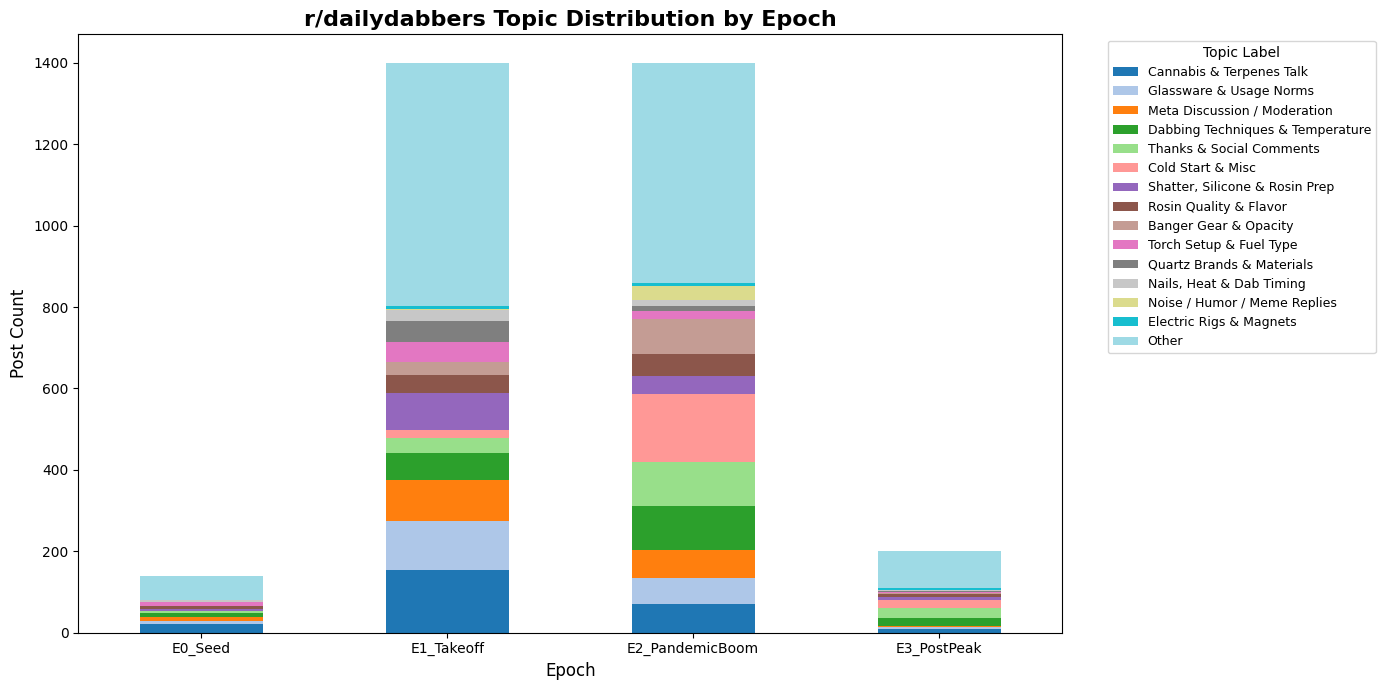

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 7))
topic_epoch_counts.plot(kind="bar", stacked=True, ax=ax, colormap="tab20")

ax.set_title("r/dailydabbers Topic Distribution by Epoch", fontsize=16, weight='bold')
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Post Count", fontsize=12)
ax.legend(title="Topic Label", bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
topic_epoch_pivot = (
    epoch_sample_df
    .groupby(["Epoch", "topic_label"])
    .size()
    .unstack(fill_value=0)
    .reindex(index=["E0_Seed", "E1_Takeoff", "E2_PandemicBoom", "E3_PostPeak"])
    .loc[:, list(label_map.values())]  # ensure consistent topic order
)

topic_epoch_pivot


topic_label,Cannabis & Terpenes Talk,Glassware & Usage Norms,Meta Discussion / Moderation,Dabbing Techniques & Temperature,Thanks & Social Comments,Cold Start & Misc,"Shatter, Silicone & Rosin Prep",Rosin Quality & Flavor,Banger Gear & Opacity,Torch Setup & Fuel Type,Quartz Brands & Materials,"Nails, Heat & Dab Timing",Noise / Humor / Meme Replies,Electric Rigs & Magnets,Other
Epoch,,,,,,,,,,,,,,,
E0_Seed,21,7,11,9,4,1,6,6,0,10,1,3,0,0,61
E1_Takeoff,155,120,99,68,37,19,90,46,31,48,52,28,3,6,598
E2_PandemicBoom,70,64,69,107,109,168,43,54,86,20,13,13,35,7,542
E3_PostPeak,9,4,3,19,25,21,7,7,3,2,2,2,1,4,91
